<a href="https://colab.research.google.com/github/rickyprimay/ALPRO-4213/blob/main/with_data_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

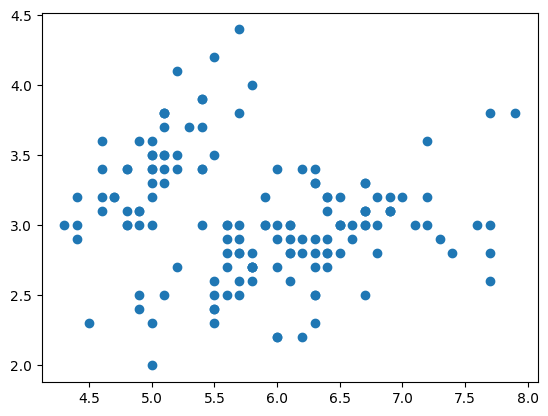

In [2]:
iris = datasets.load_iris()
features = iris.data
plt.scatter(features[:, 0], features[:, 1])
plt.show()

In [3]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

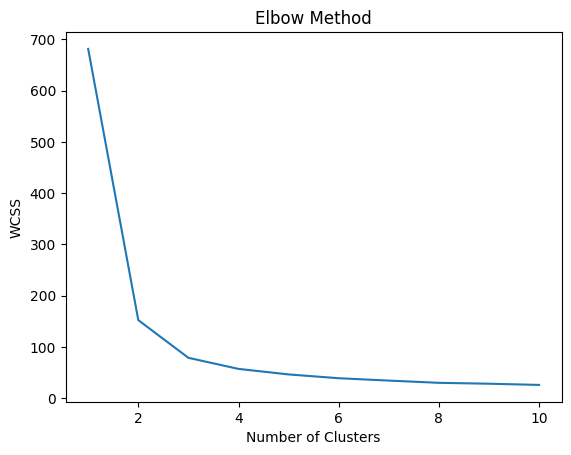

In [4]:
from sklearn.metrics import silhouette_samples, silhouette_score
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

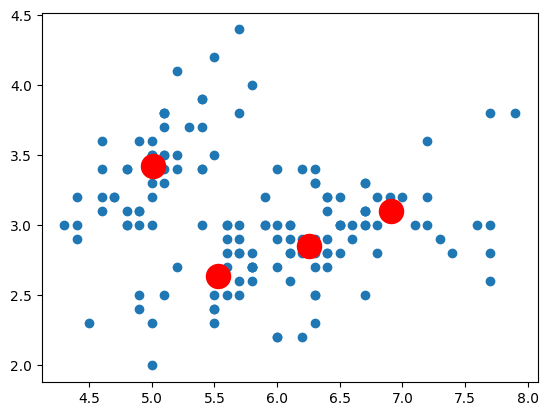

In [5]:
kmeans = KMeans(n_clusters=4, init="k-means++",
                max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(features)
plt.scatter(features[:, 0], features[:, 1])
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:, 1], s=300, c="red")